### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [4]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [5]:
# leer csv
df = pd.read_csv("data/PAPAYA_FISICOQUIMICOS.csv")

In [6]:
# estructura del csv
df.head()

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,Pa-AC-1,0.298747,4.4,0.315,49.080735,10.965792,1.727984,62.3189,42.8767,77.4643,...,8.171828,7.74643,1.412497,0.817183,1.875403,22.001089,20.100005,1.901084,16.030,6.879787
1,Pa-AC-1,0.298747,4.4,0.323,44.506481,10.870800,1.759223,62.5220,43.0008,77.5659,...,8.047318,7.75659,1.412478,0.804732,1.872500,21.374351,19.706352,1.667998,16.156,7.010996
2,Pa-AC-1,0.312966,4.4,0.323,46.988670,10.288960,1.720699,62.4941,43.1676,77.6235,...,7.983207,7.76235,1.415267,0.798321,1.877934,22.001089,20.100005,1.901084,16.056,6.940326
3,Pa-AC-1,0.298747,4.4,0.315,48.080735,10.965792,1.727984,62.3054,42.8736,77.5960,...,8.071828,7.75960,1.412611,0.807183,1.876403,21.743508,19.706352,1.667998,16.030,6.979787
4,Pa-AC-1,0.298747,4.4,0.321,46.506481,10.870800,1.759223,62.6256,43.3360,77.5275,...,8.097318,7.75275,1.416556,0.809732,1.873500,21.901089,20.100005,1.901084,16.086,7.000996


In [7]:
df.MUESTRA.unique()

array(['Pa-AC-1', 'Pa-AC-2', 'Pa-LIO-1', 'Pa-LIO-2'], dtype=object)

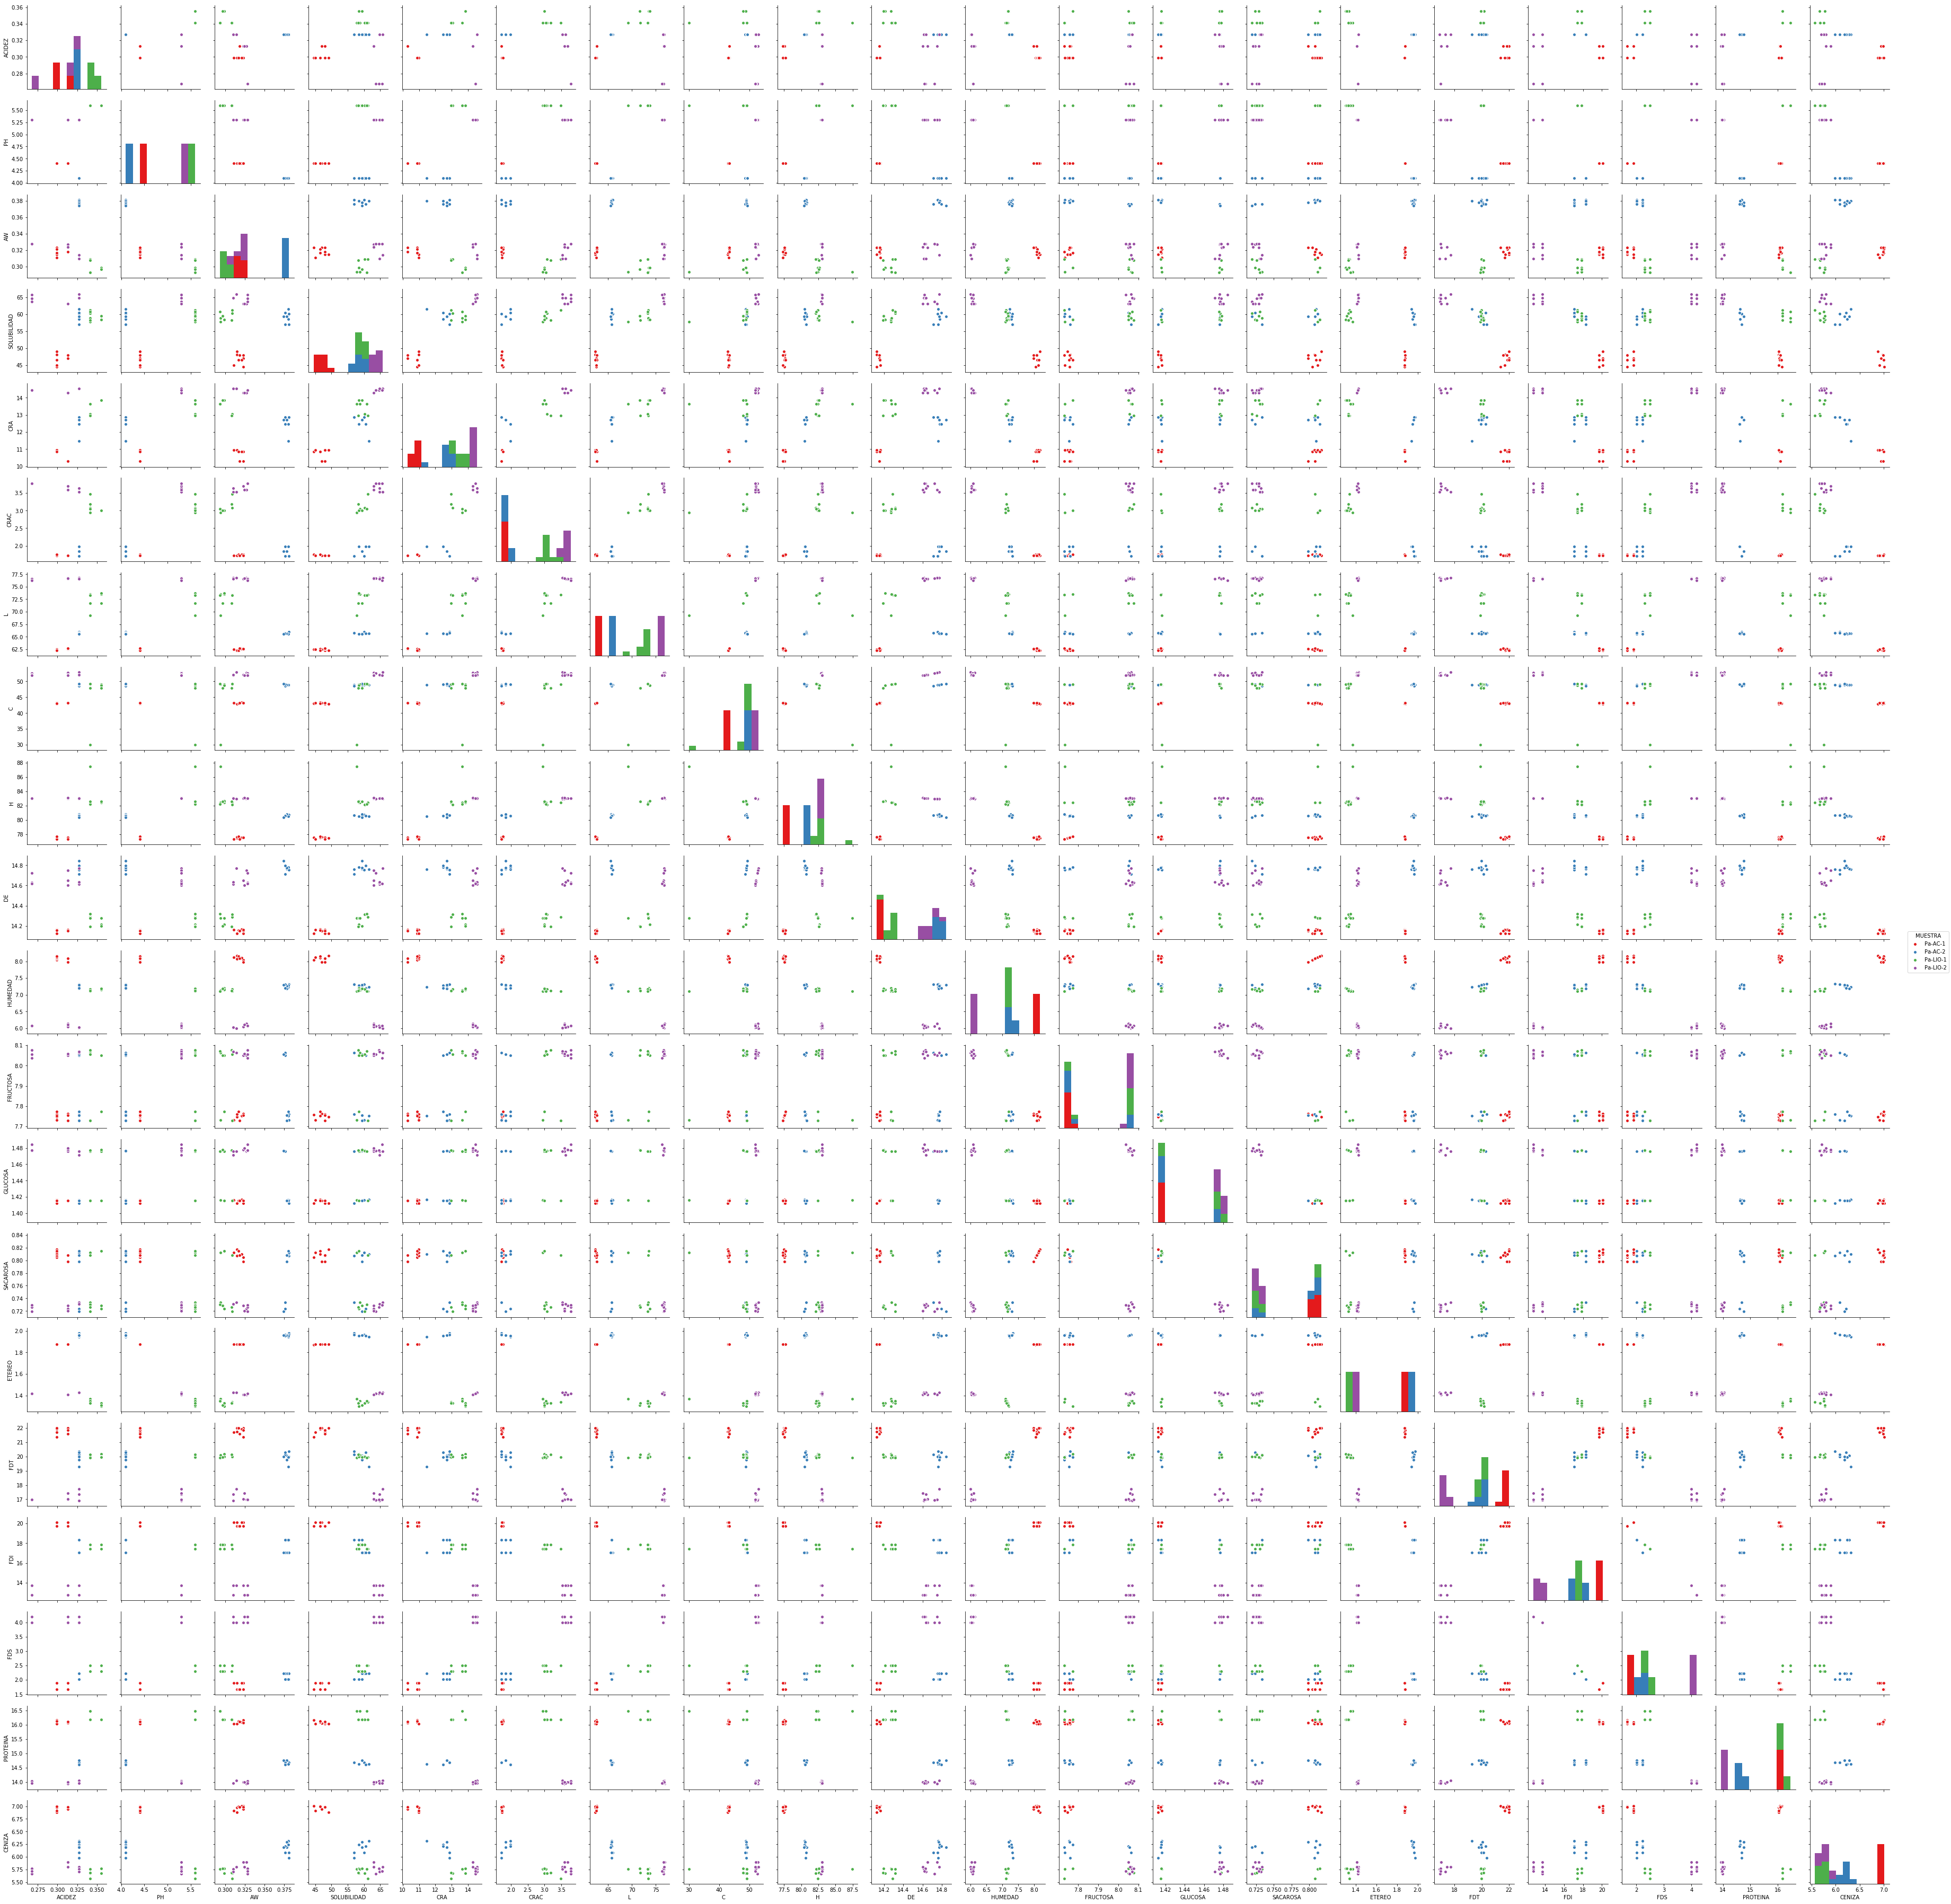

In [8]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [9]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [10]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    Pa-AC-1       1.00      1.00      1.00         2
    Pa-AC-2       1.00      1.00      1.00         4
   Pa-LIO-1       1.00      1.00      1.00         1
   Pa-LIO-2       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        11



In [13]:
print(confusion_matrix(y_test,predictions))

[[2 0 0 0]
 [0 4 0 0]
 [0 0 1 0]
 [0 0 0 4]]


In [14]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['ACIDEZ',
 'PH',
 'AW',
 'SOLUBILIDAD',
 'CRA',
 'CRAC',
 'L',
 'C',
 'H',
 'DE',
 'HUMEDAD',
 'FRUCTOSA',
 'GLUCOSA',
 'SACAROSA',
 'ETEREO',
 'FDT',
 'FDI',
 'FDS',
 'PROTEINA',
 'CENIZA']

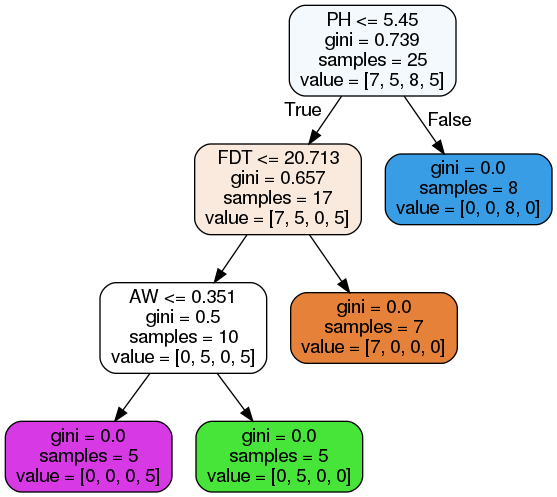

In [15]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [16]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[2 0 0 0]
 [0 4 0 0]
 [0 0 1 0]
 [0 0 0 4]]


In [18]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    Pa-AC-1       1.00      1.00      1.00         2
    Pa-AC-2       1.00      1.00      1.00         4
   Pa-LIO-1       1.00      1.00      1.00         1
   Pa-LIO-2       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00        11



In [19]:
# PCA
from sklearn.preprocessing import StandardScaler

In [20]:
X = df.drop("MUESTRA", axis=1)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_data = scaler.transform(X)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
x_pca = pca.transform(scaled_data)

In [26]:
scaled_data.shape

(36, 20)

In [27]:
x_pca.shape

(36, 2)

In [28]:
X.head()

,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,DE,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,0.298747,4.4,0.315,49.080735,10.965792,1.727984,62.3189,42.8767,77.4643,14.124968,8.171828,7.74643,1.412497,0.817183,1.875403,22.001089,20.100005,1.901084,16.030,6.879787
1,0.298747,4.4,0.323,44.506481,10.870800,1.759223,62.5220,43.0008,77.5659,14.124784,8.047318,7.75659,1.412478,0.804732,1.872500,21.374351,19.706352,1.667998,16.156,7.010996
2,0.312966,4.4,0.323,46.988670,10.288960,1.720699,62.4941,43.1676,77.6235,14.152672,7.983207,7.76235,1.415267,0.798321,1.877934,22.001089,20.100005,1.901084,16.056,6.940326
3,0.298747,4.4,0.315,48.080735,10.965792,1.727984,62.3054,42.8736,77.5960,14.126112,8.071828,7.75960,1.412611,0.807183,1.876403,21.743508,19.706352,1.667998,16.030,6.979787
4,0.298747,4.4,0.321,46.506481,10.870800,1.759223,62.6256,43.3360,77.5275,14.165562,8.097318,7.75275,1.416556,0.809732,1.873500,21.901089,20.100005,1.901084,16.086,7.000996


In [54]:
def generar_indice(elemento):
    if elemento == "Pa-AC-1":
        return 1
    if elemento == "Pa-AC-2":
        return 2
    if elemento == "Pa-LIO-1":
        return 3
    if elemento == "Pa-LIO-2":
        return 4

In [30]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

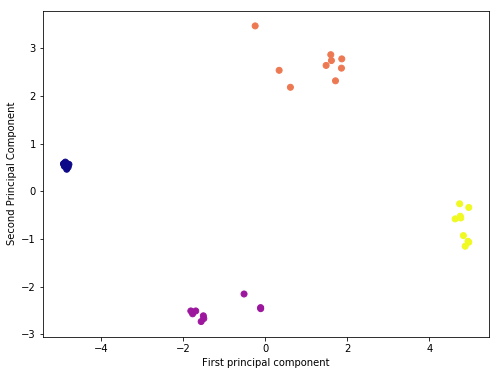

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [32]:
# interpreting the components
pca.components_

array([[ 0.01594531,  0.19569212, -0.05256133,  0.25576298,  0.26745853,
         0.25778443,  0.27110361,  0.19667236,  0.23643847,  0.14108964,
        -0.27151353,  0.22945962,  0.23290442, -0.22678081, -0.21285319,
        -0.26269032, -0.25927192,  0.25300184, -0.16931798, -0.24706478],
       [ 0.19130622,  0.3686568 , -0.47305268, -0.11140367,  0.01199463,
         0.15843201,  0.1032761 , -0.20613797,  0.09885156, -0.42405714,
         0.09186451,  0.03783096,  0.03520265, -0.0275847 , -0.33262686,
         0.12988867,  0.12834487, -0.0712349 ,  0.39701683, -0.06894716]])

In [33]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

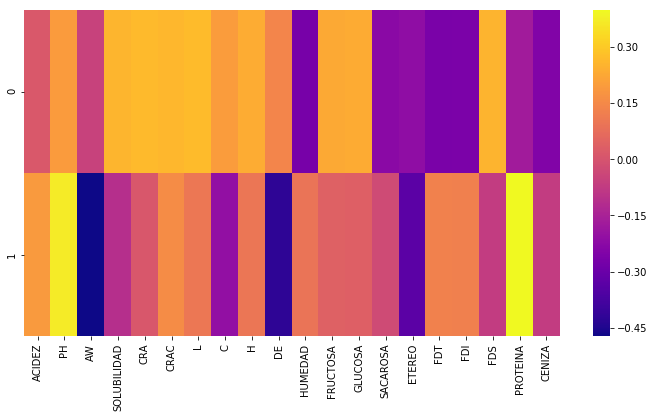

In [34]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [35]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [36]:
# using KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,pred))

[[3 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 2]]


In [41]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [42]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

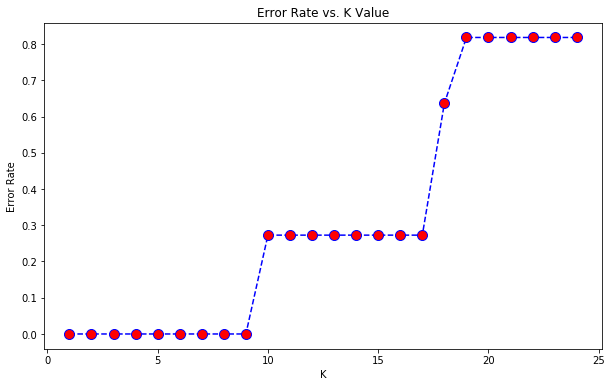

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[3 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 2]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         3
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00        11



In [45]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[0 0 3 0]
 [1 0 3 0]
 [0 0 2 0]
 [0 0 2 0]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00         3
          2       0.00      0.00      0.00         4
          3       0.20      1.00      0.33         2
          4       0.00      0.00      0.00         2

avg / total       0.04      0.18      0.06        11



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

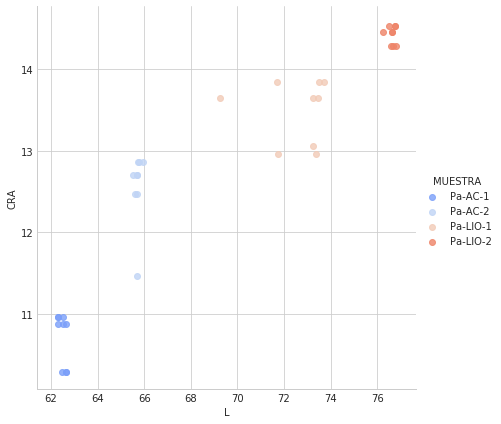

In [46]:
sns.set_style('whitegrid')
sns.lmplot('L','CRA',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [47]:
from sklearn.cluster import KMeans

In [48]:
kmeans = KMeans(n_clusters=6)

In [49]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.cluster_centers_

array([[ 0.30348681,  4.4       ,  0.31844444, 46.96973985, 10.7085171 ,
         1.73596871, 62.48494444, 43.12707778, 77.52165556, 14.14722033,
         8.07856211,  7.75216556,  1.41472203,  0.80785621,  1.87572353,
        21.79235144, 19.88130908,  1.7715921 , 16.07733333,  6.96573313],
       [ 0.30262403,  5.3       ,  0.32133333, 64.29503676, 14.42342821,
         3.65640141, 76.62721111, 52.25046667, 83.01092222, 14.66642682,
         6.06346498,  8.05918778,  1.47720313,  0.72694967,  1.41888915,
        17.15270736, 13.20956254,  4.102126  , 13.98644444,  5.77587223],
       [ 0.32706844,  4.1       ,  0.37783333, 60.0165663 , 12.48295513,
         1.87001113, 65.71756667, 48.99435   , 80.58556667, 14.78254807,
         7.24823769,  7.846415  ,  1.43609428,  0.77855599,  1.95613312,
        19.8926926 , 17.26807963,  2.18299443, 14.697     ,  6.21225324],
       [ 0.34676538,  5.6       ,  0.301     , 59.45295692, 13.47744995,
         3.10540627, 73.0022375 , 48.7424625 , 8

In [51]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 2, 2, 2, 5, 2, 5, 2, 2, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [52]:
df.head()

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,HUMEDAD,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA
0,Pa-AC-1,0.298747,4.4,0.315,49.080735,10.965792,1.727984,62.3189,42.8767,77.4643,...,8.171828,7.74643,1.412497,0.817183,1.875403,22.001089,20.100005,1.901084,16.030,6.879787
1,Pa-AC-1,0.298747,4.4,0.323,44.506481,10.870800,1.759223,62.5220,43.0008,77.5659,...,8.047318,7.75659,1.412478,0.804732,1.872500,21.374351,19.706352,1.667998,16.156,7.010996
2,Pa-AC-1,0.312966,4.4,0.323,46.988670,10.288960,1.720699,62.4941,43.1676,77.6235,...,7.983207,7.76235,1.415267,0.798321,1.877934,22.001089,20.100005,1.901084,16.056,6.940326
3,Pa-AC-1,0.298747,4.4,0.315,48.080735,10.965792,1.727984,62.3054,42.8736,77.5960,...,8.071828,7.75960,1.412611,0.807183,1.876403,21.743508,19.706352,1.667998,16.030,6.979787
4,Pa-AC-1,0.298747,4.4,0.321,46.506481,10.870800,1.759223,62.6256,43.3360,77.5275,...,8.097318,7.75275,1.416556,0.809732,1.873500,21.901089,20.100005,1.901084,16.086,7.000996


In [53]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [55]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,ACIDEZ,PH,AW,SOLUBILIDAD,CRA,CRAC,L,C,H,...,FRUCTOSA,GLUCOSA,SACAROSA,ETEREO,FDT,FDI,FDS,PROTEINA,CENIZA,Cluster
0,Pa-AC-1,0.298747,4.4,0.315,49.080735,10.965792,1.727984,62.3189,42.8767,77.4643,...,7.74643,1.412497,0.817183,1.875403,22.001089,20.100005,1.901084,16.030,6.879787,1
1,Pa-AC-1,0.298747,4.4,0.323,44.506481,10.870800,1.759223,62.5220,43.0008,77.5659,...,7.75659,1.412478,0.804732,1.872500,21.374351,19.706352,1.667998,16.156,7.010996,1
2,Pa-AC-1,0.312966,4.4,0.323,46.988670,10.288960,1.720699,62.4941,43.1676,77.6235,...,7.76235,1.415267,0.798321,1.877934,22.001089,20.100005,1.901084,16.056,6.940326,1
3,Pa-AC-1,0.298747,4.4,0.315,48.080735,10.965792,1.727984,62.3054,42.8736,77.5960,...,7.75960,1.412611,0.807183,1.876403,21.743508,19.706352,1.667998,16.030,6.979787,1
4,Pa-AC-1,0.298747,4.4,0.321,46.506481,10.870800,1.759223,62.6256,43.3360,77.5275,...,7.75275,1.416556,0.809732,1.873500,21.901089,20.100005,1.901084,16.086,7.000996,1
5,Pa-AC-1,0.312966,4.4,0.323,47.988670,10.288960,1.720699,62.6357,43.2953,77.5604,...,7.75604,1.415857,0.798321,1.876934,21.843508,19.706352,1.667998,16.076,6.990326,1
6,Pa-AC-1,0.298747,4.4,0.311,45.080735,10.965792,1.727984,62.5169,43.2495,77.3277,...,7.73277,1.416209,0.812183,1.875403,21.701089,20.100005,1.901084,16.040,6.909787,1
7,Pa-AC-1,0.298747,4.4,0.317,46.506481,10.870800,1.759223,62.2841,43.0650,77.7297,...,7.77297,1.415720,0.814732,1.875500,21.991089,19.706352,1.667998,16.126,6.996335,1
8,Pa-AC-1,0.312966,4.4,0.318,47.988670,10.288960,1.720699,62.6618,43.2792,77.2999,...,7.72999,1.415302,0.808321,1.877934,21.574351,19.706352,1.667998,16.096,6.983259,1
9,Pa-AC-2,0.327068,4.1,0.381,57.040000,12.860391,1.713777,65.7603,48.8788,80.6295,...,7.75960,1.412611,0.807183,1.976403,20.350833,18.331670,2.019164,14.675,5.981738,2


In [56]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0]
 [9 0 0 0 0 0]
 [0 0 6 0 0 3]
 [0 0 0 8 1 0]
 [0 9 0 0 0 0]
 [0 0 0 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       1.00      0.67      0.80         9
          3       1.00      0.89      0.94         9
          4       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         0

avg / total       0.50      0.39      0.44        36



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
